**version 5 :** 
trying to get better resault in main Algorithm & solved somethings!
<br>
**changes :**
- keeps alive the 20% of the top (after 50 % progress)
- solved the math problems with epsilon 
- some of the hyper parameters had tunned

**insights :**
<br>
- list of hyperparameter must tune that recognize:
 1. number of geneerations (time and fitness trade-off) => set to at least 20 times .
 <br>
 2. number of each populations => set to 100 .
 <br>
 3. possibilities of having mutations
 <br>
 4. maximum number of depth that each tree can have
 <br>
 5. the way of crossovers (completely random or something diffrent)
 <br>
 6. change the power of mse in middle of way
 <br>
 7. the time that is better to keeps them alive 
 <br>
 8. the percentage of each gen must keeps alive
 <br>
</list>
- problems of domain in caclulates and infinity => cuz of cos or sin of infinity => soloutuon : add an epsilon! 


setups:
- number of gens : 20 
- number of each popluations : 100
- chance of mutation : 5 % 
- percentege of saves per population : 20 % (after 50 % of way .)
- maximum number of depth : 5 

In [232]:
import random
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import math
operators = ["+" , "-" , "*" , "/" ] # can add pow to the set "^"
singleOperators = ["sin" , "cos"] # in sin & cos , right node is always NULL
epsilon = 0.0000001
x1 = 2
x2 = 5
defaultValues = (x1 , x2 )
listOfInputs = ["x1" , "x2"]
CoefficientsRagne = 10
allOperators = []
allOperators.extend(operators)
allOperators.extend(singleOperators)

In [2]:
class node ():
    def __init__(self , operator , rightnode = None , leftnode = None  , father = None):
        self.father = father
        self.leaf = False
        self.rightnode = rightnode
        self.leftnode = leftnode
        if operator in operators or operator in singleOperators  :
            self.operator = operator
        elif (type (operator) is int) or operator in listOfInputs : # this is the way we know the leaf and nodes
            self.leaf = True
            self.operator = operator 
        else :
            print("operator not assigned - wrong input")
        
    def assignOperator (self ):
        x = input()
        while (x not in operators and x not in singleOperators ) and not x.isnumeric():
            print("x is not true ! try again !")
            x = input()
        self.operator = x
        if x.isnumeric() : # clear the down nodes
            self.leaf = True
            self.leftnode = None
            self.rightnode = None
    def addNode (self , node):
        if self.leaf == False :
            if self.leftnode == None :
                self.leftnode = node
                node.father = self
                return True
            elif self.rightnode == None and self.operator not in singleOperators:
                self.rightnode = node
                node.father = self
                return True
            else:
                if self.leftnode.addNode(node) :
                    return True
                if self.operator not in singleOperators:
                    if self.rightnode.addNode(node) :
                        return True
            return False
        return False

In [3]:
test = node("")

operator not assigned - wrong input


In [4]:
test.assignOperator()

In [5]:
test

In [6]:
test.operator

'+'

In [3]:
class tree ():
    def __init__(self , root):
        self.numnerOfNodes = 1
        self.LeafList = []
        self.LeafList.append(root)
        if type( root ) is node :
            self.root = root
        else:
            print("try another time plz . ")
    def calculateFather(self,node):
        counter = 1 
        temp = node.father
        if temp != None :
            while temp.father != None :
                temp = temp.father
                counter = counter + 1
        return counter
    def addNodeInSurf (self , node ):
        MaxNumsOfFather = 1000
        nodeTemp = None
        for item in self.LeafList : 
            temp = self.calculateFather(item)
            if temp < MaxNumsOfFather :
                MaxNumsOfFather = temp
                nodeTemp = item
        if nodeTemp.leftnode == None :
            nodeTemp.leftnode = node
            node.father = nodeTemp
            self.LeafList.append(node)
            if nodeTemp.rightnode != None or nodeTemp.operator in singleOperators :
                self.LeafList.remove(nodeTemp)
        elif nodeTemp.rightnode == None and nodeTemp.operator not in singleOperators:
            nodeTemp.rightnode = node
            node.father = nodeTemp
            self.LeafList.append(node)
            if nodeTemp.leftnode != None : 
                self.LeafList.remove(nodeTemp)
        self.numnerOfNodes = self.numnerOfNodes + 1
    def addNodeIndepth (self , node):    
        if self.root.addNode(node) :
            self.LeafList.append(node)
            if node.father.operator in singleOperators :
                self.LeafList.remove(node.father)
        self.numnerOfNodes = self.numnerOfNodes + 1
    def isComplete(self):
        for item in self.LeafList :
            if item.leaf == False:
                return False
        return True
    def PostorderTraversal(self, root):
        res = []
        if root:
            res = self.PostorderTraversal(root.left)
            res = res + self.PostorderTraversal(root.right)
            res.append(root.data)
        return res

In [10]:
# test1 = node("-")
# test.addNode(test1)
# test.addNode(node(2))

In [86]:
def calculate (node , args = defaultValues):
    if node.leaf == True:
        # if node.operator == "x1" :
        #    return args[0]
        # if node.operator == "x2" :
        #    return args[1]
        for x , y  in zip(args , listOfInputs) :
            if y == node.operator :
                return x
        return node.operator
    if node.operator == "+" :
        return calculate(node.leftnode , args) + calculate(node.rightnode , args)
    elif node.operator == "-" :
        return calculate(node.leftnode , args) - calculate(node.rightnode , args)
    elif node.operator == "/" :
        divded = calculate(node.rightnode , args)
        if divded == 0 :
            divded = epsilon 
        return calculate(node.leftnode , args) / divded
    elif node.operator == "*" :
        return calculate(node.leftnode , args) * calculate(node.rightnode , args)
    elif node.operator == "^" :
        return pow( calculate(node.leftnode , args) , calculate(node.rightnode , args) )
    elif node.operator == "sin" :
        return math.sin(calculate(node.leftnode , args))
    elif node.operator == "cos" :
        # print(node.leftnode.operator)
        return math.cos(calculate(node.leftnode , args))

In [5]:
def showtree(node) :
    if node.leaf == True:
        return  f"{node.operator}"
    if node.operator == "+" :
        return f"({showtree(node.leftnode)}) + ({showtree(node.rightnode)})"
    elif node.operator == "-" :
        return f"({showtree(node.leftnode)}) - ({showtree(node.rightnode)})"
    elif node.operator == "/" :
        return f"({showtree(node.leftnode)}) / ({showtree(node.rightnode)})"
    elif node.operator == "*" :
        return f"({showtree(node.leftnode)}) * ({showtree(node.rightnode)})"
    elif node.operator == "^" :
        return f"({showtree(node.leftnode)}) ^ ({showtree(node.rightnode)})"
    elif node.operator == "sin" :
        return f"sin({showtree(node.leftnode)})"
    elif node.operator == "cos" :
        return f"cos({showtree(node.leftnode)})"

In [6]:
def createRandomTree(max , Coefficients):
    numberOfDepth = random.randint(1 , max)
    # create the root
    firstOperator = random.randint(0 , len(allOperators) - 1)
    temptree = tree(node(allOperators[firstOperator]))
    # create the tree structure 
    for _ in range (0 , (2 ^ numberOfDepth) - 1) :
        firstOperator = random.randint(0 , len(allOperators) - 1)
        randomnode = temptree.LeafList[random.randint(1 , len(temptree.LeafList)) - 1]
        if temptree.calculateFather(randomnode) <= max :
            if firstOperator % 2 == 0 :
                if randomnode.rightnode == None and randomnode.operator not in singleOperators: 
                    randomnode.rightnode = node(allOperators[random.randint(0 , len(allOperators) - 1)] , father=randomnode)
                    temptree.numnerOfNodes = temptree.numnerOfNodes + 1
                    temptree.LeafList.append(randomnode.rightnode)
                elif randomnode.leftnode != None :
                    temptree.LeafList.remove(randomnode)
                else :
                    randomnode.leftnode = node(allOperators[random.randint(0 , len(allOperators) - 1)] , father=randomnode)
                    temptree.numnerOfNodes = temptree.numnerOfNodes + 1
                    temptree.LeafList.append(randomnode.leftnode)
                    temptree.LeafList.remove(randomnode)
            else:
                if randomnode.leftnode == None : 
                    randomnode.leftnode = node(allOperators[random.randint(0 , len(allOperators) - 1)] , father=randomnode)
                    temptree.numnerOfNodes = temptree.numnerOfNodes + 1
                    temptree.LeafList.append(randomnode.leftnode)
                elif randomnode.rightnode != None or randomnode.operator in singleOperators:
                    temptree.LeafList.remove(randomnode)
                else :
                    randomnode.rightnode = node(allOperators[random.randint(0 , len(allOperators) - 1)] , father=randomnode)
                    temptree.numnerOfNodes = temptree.numnerOfNodes + 1
                    temptree.LeafList.remove(randomnode)
                    temptree.LeafList.append(randomnode.rightnode)
            
    # fill the leafs
    templist = temptree.LeafList.copy()
    for lastnode in templist :
        firstOperator = random.randint(0 , len(allOperators) - 1)
        if lastnode.rightnode == None :
            if firstOperator % 2 == 0 :
                lastnode.rightnode = node( listOfInputs[random.randint(0 , len(listOfInputs) - 1)] , father=lastnode )
                temptree.numnerOfNodes = temptree.numnerOfNodes + 1
                temptree.LeafList.append(lastnode.rightnode)
            else :
                lastnode.rightnode = node( random.randint(-1 * Coefficients , Coefficients ) , father=lastnode )
                temptree.numnerOfNodes = temptree.numnerOfNodes + 1
                temptree.LeafList.append(lastnode.rightnode)
            if lastnode.leftnode != None :
                temptree.LeafList.remove(lastnode)
                #templist.remove(lastnode)
        if lastnode.leftnode == None :
            if firstOperator % 2 == 1 :
                lastnode.leftnode = node( listOfInputs[random.randint(0 , len(listOfInputs) - 1)] , father=lastnode )
                temptree.numnerOfNodes = temptree.numnerOfNodes + 1
                temptree.LeafList.append(lastnode.leftnode)
            else :
                lastnode.leftnode = node( random.randint (-1 * Coefficients , Coefficients ) , father=lastnode )
                temptree.numnerOfNodes = temptree.numnerOfNodes + 1
                temptree.LeafList.append(lastnode.leftnode)
            if lastnode.rightnode != None :
                temptree.LeafList.remove(lastnode)
                #templist.remove(lastnode)
    return temptree
        
        

**test the add in surf**

In [114]:
testtree2= tree(test)

In [115]:
testtree2.LeafList

In [116]:
testtree2.addNodeInSurf(node("+"))

In [117]:
testtree2.addNodeInSurf(node("+"))

In [118]:
testtree2.addNodeInSurf(node("-"))

In [119]:
testtree2.addNodeInSurf(node("-"))

**test add in depth**

In [120]:
testtree2.addNodeIndepth(node("-"))

In [121]:
testtree2.addNodeIndepth(node("-"))

**test the calculate**

In [11]:
testtree = tree(node("sin"))

In [12]:
#simple test with 
testtree.addNodeInSurf(node("/"))
testtree.addNodeInSurf(node("*"))
testtree.addNodeInSurf(node(x1))
testtree.addNodeInSurf(node(x2))
testtree.addNodeInSurf(node(x1))
testtree.addNodeInSurf(node(x2))
print( calculate(testtree.root , (2 , 5)) )

-0.9589242746631385


**test the showtree**

In [13]:
print(showtree(testtree.root))

sin(((5) * (2)) / (2))


**test the random creation**

In [20]:
testRandom1 =  createRandomTree(10 , 5)

In [21]:
print(showtree(testRandom1.root))

((-4) - (((2) / (x1)) / ((cos(x1)) * (x1)))) * (sin(cos(cos((3) + (x1)))))


In [22]:
print(calculate( testRandom1.root , (3 , 6)))

-2.0481313613372


In [23]:
testRandom1.numnerOfNodes

19

**the main function**

In [87]:
def calculateValue(inputValues , root):
    predicted = []
    for tupleIn in inputValues:
        predicted.append( calculate(root , tupleIn))
    return predicted

In [88]:
def RandomSelection(mses , population):
    total = []
    cumsum = 0 
    for i in mses :
        cumsum = cumsum + i
        total.append(cumsum)
    rnd = random.random() * cumsum
    for i, uptotal in enumerate(total):
        if rnd < uptotal:
            return population[i]
    return population[-1] # if something goes wrong !

In [89]:
import copy
def iterate ( node , numberOfrotate , visited):
    # temp = copy.deepcopy(node)
    # print(numberOfrotate)
    visited = []
    counter = 0 
    while counter != numberOfrotate:
        if node.rightnode != None and node.rightnode not in visited:
            counter = counter + 1
            visited.append(node.rightnode)
            node = node.rightnode
        elif node.leftnode != None and node.leftnode not in visited :
            counter = counter + 1
            visited.append(node.leftnode)
            node = node.leftnode
        else :
            if node.father != None :
                node = node.father
            else :
                node = node.leftnode
                counter = counter + 1
    return node   

In [10]:
testtree = tree(node("-"))
testtree.root.leftnode = node("+" , father=testtree.root)
testtree.root.rightnode = node(4 , father=testtree.root)
testtree.root.leftnode.leftnode = node(4 , father=testtree.root.leftnode)
testtree.root.leftnode.rightnode = node("+" , father = testtree.root.leftnode)
testtree.root.leftnode.rightnode.leftnode = node("-" , father=testtree.root.leftnode.rightnode)
testtree.root.leftnode.rightnode.leftnode.leftnode = node("x1" , father=testtree.root.leftnode.rightnode.leftnode)
testtree.root.leftnode.rightnode.leftnode.rightnode = node(7, father=testtree.root.leftnode.rightnode.leftnode)
testtree.root.leftnode.rightnode.rightnode = node("-" , father=testtree.root.leftnode.rightnode)
testtree.root.leftnode.rightnode.rightnode.leftnode = node("x2" , father=testtree.root.leftnode.rightnode.rightnode)
testtree.root.leftnode.rightnode.rightnode.rightnode = node(5 , father=testtree.root.leftnode.rightnode.rightnode)
testtree.numnerOfNodes = 11
print(showtree(testtree.root))

((4) + (((x1) - (7)) + ((x2) - (5)))) - (4)


In [17]:
Mutation(testtree)

In [18]:
print(showtree(testtree.root))

((4) + (((x1) - (7)) + ((x1) - (5)))) - (4)


**test the iterate**


In [31]:
testtree2 = tree(node("+"))
testtree2.addNodeInSurf(node(x1))
testtree2.addNodeInSurf(node(x2))
print(showtree(testtree2.root))
print(iterate(testtree2.root , 1 , [] ).operator)

(2) + (5)
5


In [12]:
import copy

def CrossOver (x , y) :
    maxOfNodes = 0 
    if x.numnerOfNodes > y.numnerOfNodes :
        maxOfNodes = y.numnerOfNodes
    else :
        maxOfNodes = x.numnerOfNodes
    rnd = random.randint( 1 , maxOfNodes - 1 )
    # print(rnd)
    
    temptree = copy.deepcopy(x)
    temptree1 = copy.deepcopy(y)
    
    firstNode = iterate(temptree.root , rnd , [])
    secondNode = iterate(temptree1.root , rnd , [])
    firstFather =  firstNode.father 
    secondFather =  secondNode.father 
    
    temp = copy.deepcopy(firstNode)
    # print(temp.operator)
    temp1 = copy.deepcopy(secondNode)
    # print(temp1.operator)
    
    
    if firstFather.leftnode == firstNode :
        firstFather.leftnode = temp1
    else :
        firstFather.rightnode = temp1
    
    if secondFather.leftnode == secondNode :
        secondFather.leftnode = temp
    else :
        secondFather.rightnode = temp
    
    temp1.father = firstFather
    temp.father = secondFather
    
    del firstNode
    del secondNode
    
    return temptree , temptree1

**test the CrossOver**

In [28]:
testtree = tree(node("-")) # check the cross over
testtree.addNodeInSurf(node(x2))
testtree.addNodeInSurf(node(x1))
print(showtree(testtree.root))
testtree2 = tree(node("+"))
testtree2.addNodeInSurf(node(x1))
testtree2.addNodeInSurf(node(x2))
print(showtree(testtree2.root))
temptest , temptest1 = CrossOver(testtree , testtree2)
print(showtree(temptest.root))
print(showtree(temptest1.root))


(5) - (2)
(2) + (5)
(5) - (5)
(2) + (2)


In [13]:
def Mutation (tree) :
    rnd = random.randint( 1 , tree.numnerOfNodes - 1 )
    #print(showtree(tree.root))
    changeNode = iterate(  tree.root , rnd , [] )
    if changeNode.operator in allOperators :
        changeNode.operator = allOperators[random.randint(0 , len(allOperators) - 1)]        
        if changeNode.operator in singleOperators :
            changeNode.rightnode = None
        elif changeNode.rightnode == None :
            changeNode.rightnode = node( listOfInputs[random.randint(0 , len(listOfInputs) - 1)] , father=changeNode )           
    else:
        if rnd % 2 == 0 :
            changeNode.operator = listOfInputs[random.randint(0 , len(listOfInputs) - 1)]
        else :
            changeNode.operator = random.randint (-1 * CoefficientsRagne , CoefficientsRagne )

In [26]:
AllData = []

In [113]:
def general_algorithm(NumOfFirstPop , maxOfDepth , numsOfGenereations , inputValue , trueValue , AllMses):
    # first create a population 
    bests = []
    population = []
    for _ in range(0 , NumOfFirstPop):
        population.append(createRandomTree(maxOfDepth , CoefficientsRagne))
    # main loop
    AllMses = []
    counter = 0 
    while counter != numsOfGenereations :
        # fitness values
        mses = []
        for i in range(0 , NumOfFirstPop):
            mses.append(mean_squared_error(trueValue , calculateValue(inputValue , population[i].root ) ))    
        #print(mses)
        # keep bests alive!
        newPopulation = []
        if counter >= numsOfGenereations / 2 :
            tempList = [X for _ , X in sorted(zip( mses , population ) , key= lambda elem : elem[0])]
            sortedmses = [x for x in sorted(mses)]
            templegends = []
            for i in range(math.floor( len(population) * 0.2)) :
                newPopulation.append(tempList[i])
                templegends.append(sortedmses[i])
            bests.append(templegends)
        # change the mse up to it is negetive fitness
        AllMses.append(mses)
        MaxOfmses = max( mses )
        for i in range(0 , NumOfFirstPop):
            mses[i] = mses[i] * -1 + MaxOfmses
        # select randomly with their fitness
        for _ in range(math.floor( (len(population) - len(newPopulation)) / 2)):
            # random select each tree for crossover
            firstNode = RandomSelection(mses , population)    
            secondNode = RandomSelection(mses , population)
            firstNewTree , secondNewTree = CrossOver(firstNode , secondNode)
            # mutations !
            rnd = random.randint(1 , 100)
            if rnd % 20 == 0 : 
                Mutation(firstNewTree) 
            rnd = random.randint(1 , 100)
            if rnd % 20 == 1 : 
                Mutation(secondNewTree) 
            newPopulation.append(firstNewTree)
            newPopulation.append(secondNewTree)
        population = newPopulation
        counter = counter + 1
    # return the best
    indexOfBest = 0 
    MaxOfmses = 0  
    for index , mse in enumerate (mses) :
        if mse > MaxOfmses : 
            indexOfBest = index 
            MaxOfmses = mse
    #print(-1 * (max(mses) - MaxOfmses))
    return  AllMses , bests , population[indexOfBest]

**create the test for the Main Algorithm**

In [197]:
# test 
# test tree with 5 depth
testMain1 = createRandomTree(5 , CoefficientsRagne )
# 300 input values
x1valuse = [x for x in range(0 , 300)]
x2values = [x for x in range(0 , 300)]
inputValue = list( zip(x1valuse , x2values) )
trueValues = []
trueValues = calculateValue(inputValue , testMain1.root)
print(showtree(testMain1.root))

(sin((5) + ((7) * ((x1) / (-2))))) * (x1)


In [230]:
#create a simple power tree
powertree = tree(node("^"))
powertree.root.leftnode = node("x1")
powertree.root.rightnode = node(2)
showtree(powertree.root)

'(x1) ^ (2)'

In [231]:
x1valuse = [x for x in range(0 , 300)]
x2values = [x for x in range(0 , 300)]
inputValue = list( zip(x1valuse , x2values) )
trueValues = []
trueValues = calculateValue(inputValue , powertree.root)

In [221]:
trueValues

[0,
 1,
 4,
 9,
 16,
 25,
 36,
 49,
 64,
 81,
 100,
 121,
 144,
 169,
 196,
 225,
 256,
 289,
 324,
 361,
 400,
 441,
 484,
 529,
 576,
 625,
 676,
 729,
 784,
 841,
 900,
 961,
 1024,
 1089,
 1156,
 1225,
 1296,
 1369,
 1444,
 1521,
 1600,
 1681,
 1764,
 1849,
 1936,
 2025,
 2116,
 2209,
 2304,
 2401,
 2500,
 2601,
 2704,
 2809,
 2916,
 3025,
 3136,
 3249,
 3364,
 3481,
 3600,
 3721,
 3844,
 3969,
 4096,
 4225,
 4356,
 4489,
 4624,
 4761,
 4900,
 5041,
 5184,
 5329,
 5476,
 5625,
 5776,
 5929,
 6084,
 6241,
 6400,
 6561,
 6724,
 6889,
 7056,
 7225,
 7396,
 7569,
 7744,
 7921,
 8100,
 8281,
 8464,
 8649,
 8836,
 9025,
 9216,
 9409,
 9604,
 9801,
 10000,
 10201,
 10404,
 10609,
 10816,
 11025,
 11236,
 11449,
 11664,
 11881,
 12100,
 12321,
 12544,
 12769,
 12996,
 13225,
 13456,
 13689,
 13924,
 14161,
 14400,
 14641,
 14884,
 15129,
 15376,
 15625,
 15876,
 16129,
 16384,
 16641,
 16900,
 17161,
 17424,
 17689,
 17956,
 18225,
 18496,
 18769,
 19044,
 19321,
 19600,
 19881,
 20164,
 2

In [233]:
AllData , legends , bestNode = general_algorithm(100 , 5 , 20 , inputValue , trueValues , AllData) 

In [234]:
np.shape(AllData)

(20, 100)

In [235]:
legends = np.transpose(legends)
np.shape(legends)
avg_of_legends = legends.mean(axis=0)

In [236]:
avg_of_legends

array([ 1.40012900e+08,  1.17989660e+08,  7.87510477e+07,  8.15787410e+06,
       -1.06701714e+06, -4.74941950e+06, -5.30573621e+06, -1.15192011e+07,
       -2.08573978e+07, -2.92698665e+07])

In [237]:
# line plot of growing the bests
px.line(avg_of_legends)

In [238]:
showtree(bestNode.root)

'(x2) * ((x1) * ((x2) + (x2)))'

In [239]:
showtree( powertree.root )

'(x1) ^ (2)'

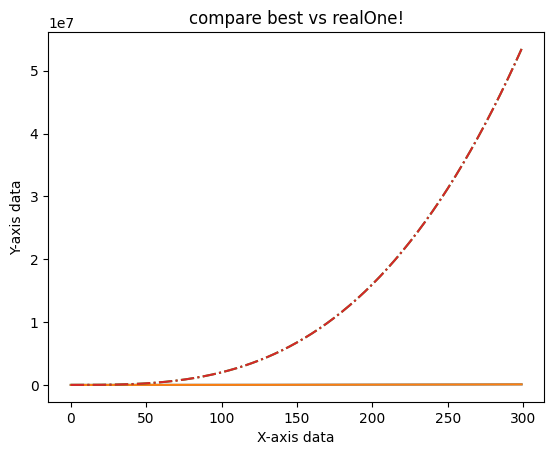

In [240]:
plt.plot(inputValue , trueValues)
plt.plot(inputValue , calculateValue(inputValue , bestNode.root) , '-.')
plt.xlabel("X-axis data")
plt.ylabel("Y-axis data")
plt.title("compare best vs realOne!")
plt.show()